# Statistics for Datscience with Housing Data 

## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

## Loading Dataset

In [31]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [32]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Generate Descriptive Statistics and Visualizations

In [33]:
boston_df.describe(include="all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
#check for NA values
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


### 1. For the "Median value of owner-occupied homes" provide a boxplot

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Median Value in 1000$')

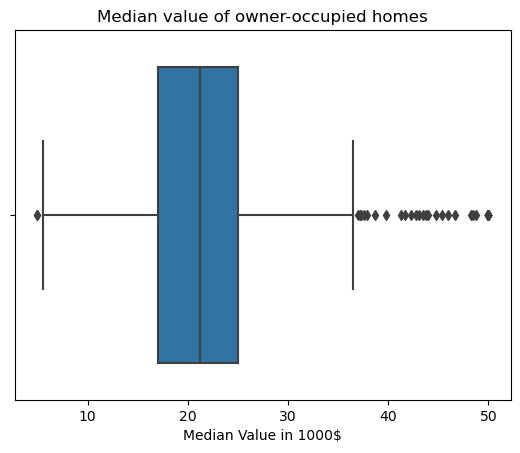

In [7]:
sns.boxplot(boston_df.MEDV)
plt.title("Median value of owner-occupied homes")
plt.xlabel("Median Value in 1000$")

**Observations:**

The above boxplot describes that median of the median value of the owner-occupied homes is approximately 22000$

### 2. Provide a  bar plot for the Charles river variable

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

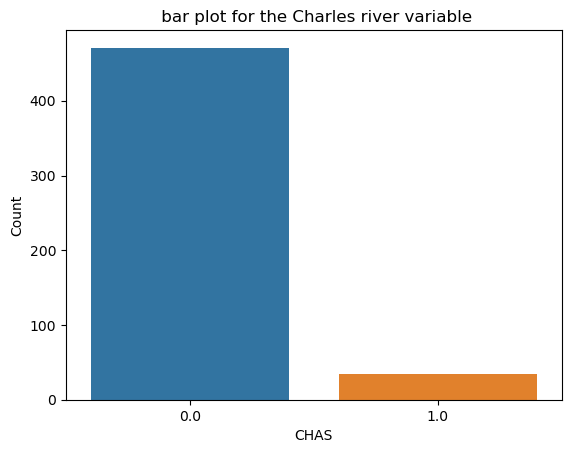

In [8]:
## Provide a  bar plot for the Charles river variable(CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise))


df = boston_df.CHAS.value_counts().reset_index()
df

sns.barplot("index","CHAS",data=df)
plt.title(" bar plot for the Charles river variable")
plt.xlabel("CHAS")
plt.ylabel("Count")


**Observations:**

From the above bar plot we can see that the majority of houses are not bounded by Charles River

### 3. Provide a boxplot for the MEDV variable vs the AGE variable.

In [9]:

##(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE']<=35.0),'age_Group'] = '35 Years and Younger'
boston_df.loc[((boston_df['AGE'] < 70.0) & (boston_df['AGE']>35.0)),'age_Group'] = 'Between 35 and 70 Years'
boston_df.loc[(boston_df['AGE']>=70),'age_Group'] = '70 years and older'


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV', ylabel='age_Group'>

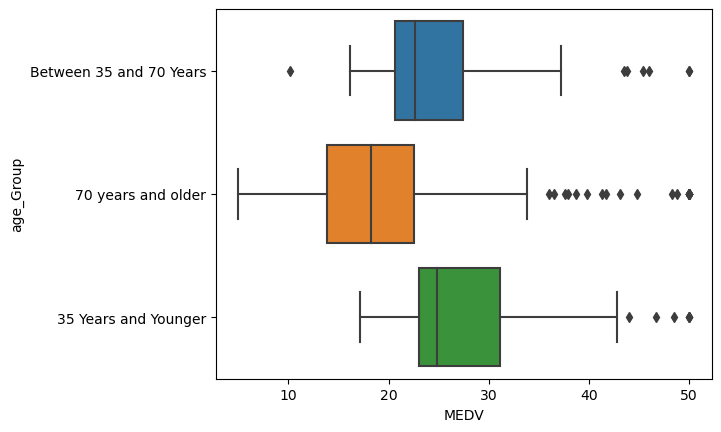

In [10]:
sns.boxplot(boston_df.MEDV,boston_df.age_Group)
plt.title('Median value of owner occupied house Vs. Age ')

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship b/n NOX and INDUS')

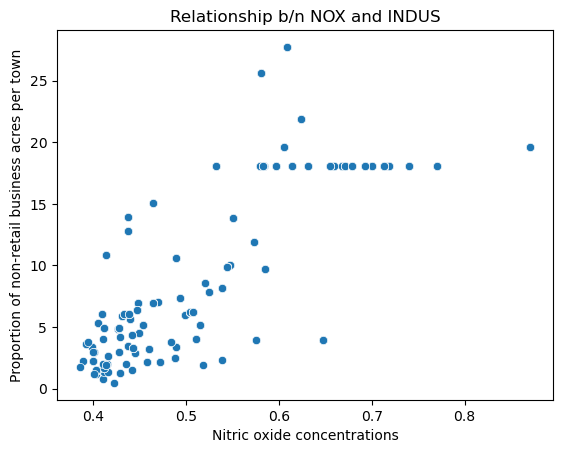

In [37]:


sns.scatterplot('NOX','INDUS',data=boston_df)
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres per town')
plt.title('Relationship b/n NOX and INDUS')


**Observations**:
we can see a smaller number of non-retail business proportions with the small amounts of nitric oxide concentrations and it is evident that there is a relationship exists between these two variables. 

### 5. Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for Pupil to Teacher Ratio')

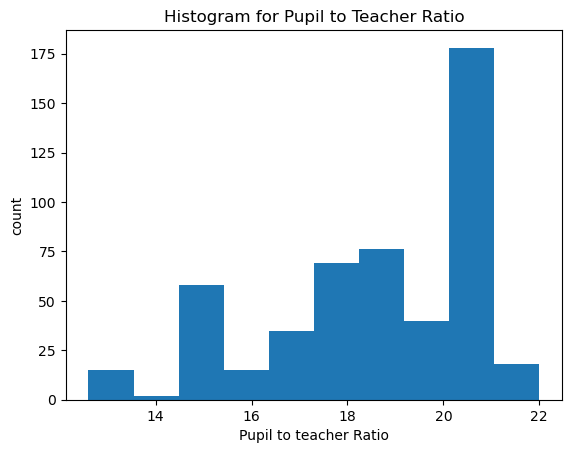

In [36]:
## Create a histogram for the pupil to teacher ratio variable

plt.hist(boston_df.PTRATIO)
plt.xlabel('Pupil to teacher Ratio')
plt.ylabel('count')
plt.title('Histogram for Pupil to Teacher Ratio')

**Observations:**

we can see that there is a majority in the pupil to Teacher ratio count when it is between 20 and 21

## Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis:**

Ho = There is no significant difference in the median value of houses bounded by the Charles river

Ha = There is significant difference in the median value of houses bounded by the Charles river

In [17]:
# Leven Test to check if variance are equal or not

scipy.stats.levene(boston_df[boston_df.CHAS == 1.0]['MEDV'],boston_df[boston_df.CHAS==0.0]['MEDV'],center="mean")

# as the p-value is less than 0.05, we can treat the vraince of both groups are equal

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [16]:
# T-test
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1.0]['MEDV'],boston_df[boston_df.CHAS==0.0]['MEDV'],equal_var=True)



Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:**
As the p-value is less than 0.05, we can reject the null hypotheis and confirm that There is significant differnce in the median value of houses bounded by the Charles river 

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Ho: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Ha: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [19]:
#As we already dicretized the age an dcreated age_group, we can use that


# boston_df.loc[(boston_df['AGE']<=35.0),'age_Group'] = '35 Years and Younger'
# boston_df.loc[((boston_df['AGE'] < 70.0) & (boston_df['AGE']>35.0)),'age_Group'] = 'Between 35 and 70 Years'
# boston_df.loc[(boston_df['AGE']>=70),'age_Group'] = '70 years and older'

scipy.stats.levene(boston_df[boston_df.age_Group == '35 Years and Younger']['MEDV'],boston_df[boston_df.age_Group=='Between 35 and 70 Years']['MEDV'],
                   boston_df[boston_df.age_Group == '70 years and older']['MEDV'], center="mean")

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [20]:
#we can see the variances of the three groups are not same but for this project we will move along

#ANOVA test
scipy.stats.f_oneway(boston_df[boston_df.age_Group == '35 Years and Younger']['MEDV'],boston_df[boston_df.age_Group=='Between 35 and 70 Years']['MEDV'],
                   boston_df[boston_df.age_Group == '70 years and older']['MEDV'])



F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:**

we can see that the p-value is less than 0.05, so we can reject the null hypothesis and confirm that there is a statstical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940


### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Ho: There isn't relationship(correlation) between Nitric oxide concentrations and proportion of non-retail business acres per town

Ha: There is a relationship between the Nitric oxide concentrations and proportion of non-retail business acres per town

In [23]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:**

we can see that the p-value is less than 0.05, so we can reject the null hypothesis and confirm that there is a relationship between the Nitric oxide concentrations and proportion of non-retail business acres per town


### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Ho: There is not an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

Ha: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [25]:
x=boston_df['DIS']
y=boston_df['MEDV']

In [29]:
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        20:21:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**
we can see that the p-value is less than 0.05, so we can reject the null hypothesis and confirm that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes and also depicts that the additional weighted distance to the five Boston employment centres increases the median value of owner occupie homes by 1.0916 times.